### CLASSIFICATION ON IMBALANCED DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\symni\Downloads\afcf0-insurance-claims-data\Insurance claims data.csv")

In [3]:
df=df1.copy()

In [4]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [7]:
df.value_counts()


policy_id  subscription_length  vehicle_age  customer_age  region_code  region_density  segment  model  fuel_type  max_torque     max_power          engine_type                airbags  is_esc  is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  cylinder  transmission_type  steering_type  turning_radius  length  width  gross_weight  is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  is_brake_assist  is_power_door_locks  is_central_locking  is_power_steering  is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  claim_status
POL000001  5.2                  1.0          54            C1           4990            A        M1     CNG        60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine          2        No      No                      No       Yes                 No                 Drum              796           3         Manual             Power

In [8]:
df.value_counts('claim_status')

claim_status
0    54844
1     3748
Name: count, dtype: int64

In [9]:
#abive we can see that the claim status is highly imabalanced

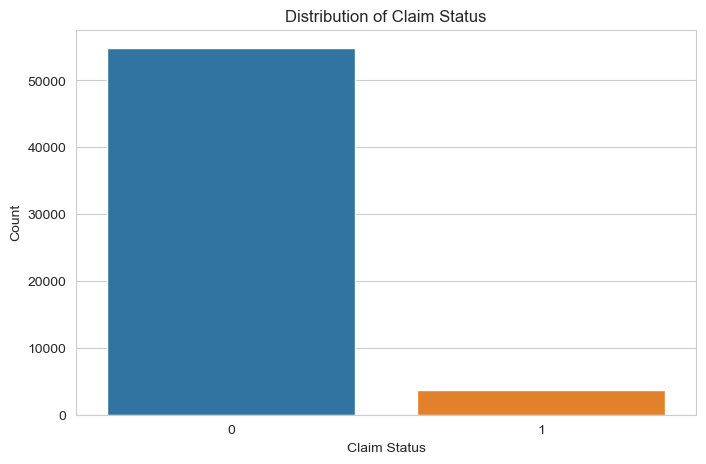

In [10]:
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

In [11]:
categorical_columns=df.select_dtypes(include=['object']).columns.to_list()
print(categorical_columns)
print(len(categorical_columns))

['policy_id', 'region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
28


In [12]:
numerical_columns=df.select_dtypes(include =['int64','float64']).columns.to_list()
print(numerical_columns)
print(len(numerical_columns))

['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating', 'claim_status']
13


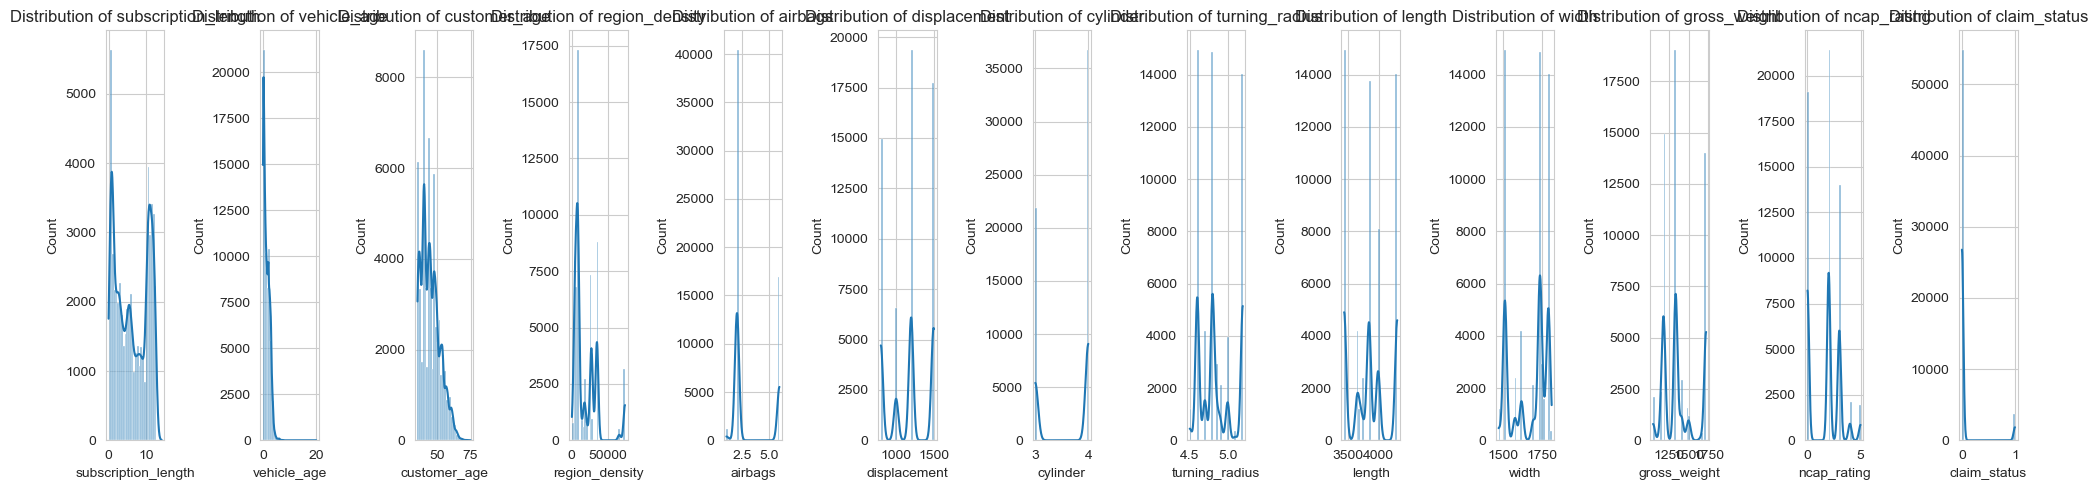

In [13]:
plt.figure(figsize=(20, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 13, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [14]:
### in this the Y or the dependent feature is the claim status, and we know that its highly imalanced, so we nned to balance it

### Handling Class Imbalance

In [15]:
from sklearn.utils import resample

# we need to seperate the majority and minority classes

In [16]:
majority_class = df[df['claim_status']==0]
minority_class = df[df['claim_status']==1]


In [17]:
resampled_column = resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42)

In [18]:
oversampled_data = pd.concat([majority_class,resampled_column ])

In [19]:
oversampled_data.value_counts('claim_status')

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [20]:
df = oversampled_data

In [21]:
df.value_counts('claim_status')

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [22]:
# now the value counts in the column is the same

### Feature importance

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
#1st- train test split it, then need to encode the categorical features using OHE(for x),then apply the scaling 

In [25]:
#1 split the data

X = df.drop('claim_status',axis=1)
y= df['claim_status']

In [26]:
X.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5


In [27]:
y.value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [28]:
#2 apply OHE
# scaling is not required becasue RF is tree based and split the data based on threshold (eg is age<=20)

cat_cols = df.select_dtypes(include=['object']).columns

In [29]:
preprocessor= ColumnTransformer( 
    transformers=[ ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) ], remainder='passthrough' )

In [30]:
X_new = preprocessor.fit_transform(X)

In [31]:
# Now we applyt the RF model for finding important features

In [32]:
model = RandomForestClassifier(random_state =42)
model.fit(X_new,y)

RandomForestClassifier(random_state=42)

In [33]:
feature_names = preprocessor.get_feature_names_out()

In [35]:
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_}) 
features_df = features_df.sort_values(by='Importance', ascending=False)

In [52]:
print(features_df.head(20))

                              Feature  Importance
58704  remainder__subscription_length    0.100551
58705          remainder__vehicle_age    0.073844
58706         remainder__customer_age    0.064908
58707       remainder__region_density    0.013045
58612             cat__region_code_C8    0.003059
58603             cat__region_code_C2    0.002657
58609             cat__region_code_C5    0.002381
58597            cat__region_code_C14    0.002357
58607             cat__region_code_C3    0.002316
58596            cat__region_code_C13    0.002187
58611             cat__region_code_C7    0.002159
58613             cat__region_code_C9    0.002105
58593            cat__region_code_C10    0.001910
58594            cat__region_code_C11    0.001732
58592             cat__region_code_C1    0.001706
58595            cat__region_code_C12    0.001694
58602            cat__region_code_C19    0.001687
58610             cat__region_code_C6    0.001630
58608             cat__region_code_C4    0.001296


In [54]:
#selecting top 20 features - # we shud drop low importance features before trainign else itll take a long to time to give the output
# Keep top N features (say top 20)
top_features = features_df['Feature'].head(20).tolist()
print(top_features)

['remainder__subscription_length', 'remainder__vehicle_age', 'remainder__customer_age', 'remainder__region_density', 'cat__region_code_C8', 'cat__region_code_C2', 'cat__region_code_C5', 'cat__region_code_C14', 'cat__region_code_C3', 'cat__region_code_C13', 'cat__region_code_C7', 'cat__region_code_C9', 'cat__region_code_C10', 'cat__region_code_C11', 'cat__region_code_C1', 'cat__region_code_C12', 'cat__region_code_C19', 'cat__region_code_C6', 'cat__region_code_C4', 'cat__region_code_C15']


In [55]:
# Get indices of top features 
feature_indices = [list(feature_names).index(f) for f in top_features]
# Reduce X_new to only those columns 
X_selected = X_new[:, feature_indices]

### model training

In [41]:
# train test split already imported - we have alreayd split the data to x_new and y
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X_selected, y, test_size=0.2, random_state=42, stratify=y )

In [58]:
rf_model = RandomForestClassifier(random_state=42)

In [59]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = rf_model.predict(X_test)

In [66]:
## checking the score
acc_score = accuracy_score(y_test,y_pred)*100
print(f"accuracy_score: {acc_score:.2f}%")
print(classification_report(y_test,y_pred) )
print(confusion_matrix(y_test,y_pred))

accuracy_score: 97.39%
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     10969
           1       0.95      1.00      0.97     10969

    accuracy                           0.97     21938
   macro avg       0.98      0.97      0.97     21938
weighted avg       0.98      0.97      0.97     21938

[[10397   572]
 [    0 10969]]


In [63]:
# we can see that the score is 97% which is good.

### visualization

In [68]:
correct = sum(y_test==y_pred)
incorrect = sum(y_test != y_pred)

labels = ['Correct Predictions', 'Incorrect Predictions'] 
sizes = [correct, incorrect] 
colors = ['#4CAF50', '#F44336'] # green for correct, red for incorrect
explode = (0.1, 0) # explode the correct slice a little

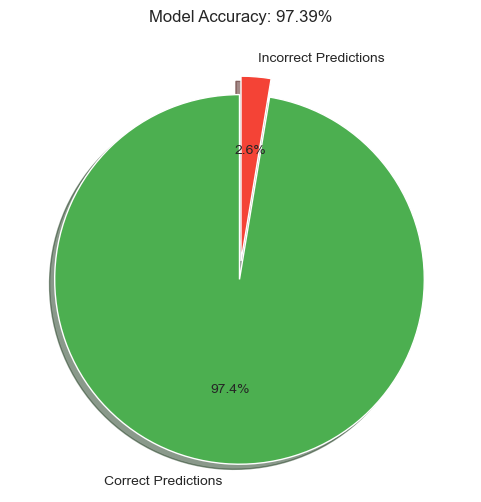

In [71]:
# Plot pie chart 
plt.figure(figsize=(6,6)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True) 
plt.title(f'Model Accuracy: {acc_score:.2f}%') 
plt.show()